In [2]:
!pip install pytesseract
!pip install Pillow

In [4]:
import pytesseract
from PIL import Image, ImageFilter

import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import cv2
import io

In [5]:
img = Image.open("images/irish_passport.jpg")
print(img.format, img.size,img.mode)

JPEG (1200, 806) RGB


In [6]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

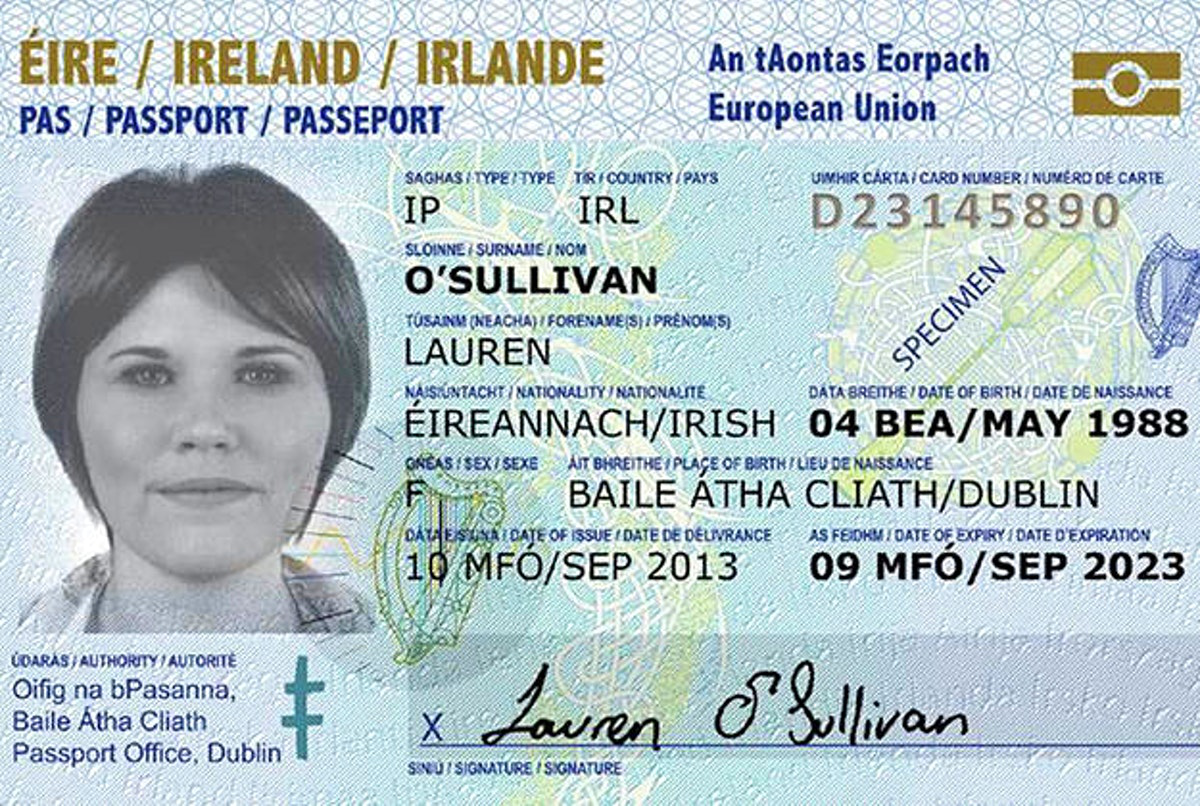

In [7]:
img

In [8]:
text = pytesseract.image_to_string(img,lang='eng')
print(text)

EIRE/ IRELAND / IRLANDE — “Anthontas Eorpach ‘tare

PAS] PASSPORT: PASSEPORT es Eeropean Union. ~ i.

   
 
    
 
      
 
  

SAGHAS|TYPESTYPE TRICOUNTRY/PAYS MH CARTA/ CARD NUMBER NUMERO DE CARTE
Ty PER SC
SLOINNE / SURNAME / NOM 5 picid Sf + $:
O’SULLIVAN © eo
TOSANIY(KEACHLA) | FORENAME!) /PRENOMS) e sa ig
LAUREN. 777 | ae 3

OC NASEINTACHT J NATIONALITY. INATIONALITE. DATASRENHE 1 DATE EOF BIRTH / ATE DE NAISSANCE

x EIREANNACH/IRISH_ 04 BEA/MAY 1988

‘¢ ISEXISEXE AST BHREITHE / PLAGE OF BIRTH LIEU DE

Pe woes BAILE ATHA CLIATH/DUBLIN
ie Liar

Y 3 LATE OF ISSUE DATE DE DEUVRANCE AS FEAOHU / ATE Of EXPIRY DATE DIEXPIRATION
ha Oa

Aad ¢ FO/SEP 2013 09 MFO/SEP 2023

WOARAS } AUTHORITY / AUTORITE Se Ze
Oifig na bPasanna, y,
Baile Atha Cliath

Passport Office, Dublin

  

  
 
 

    

S200 SIGNATURE /SONATURE


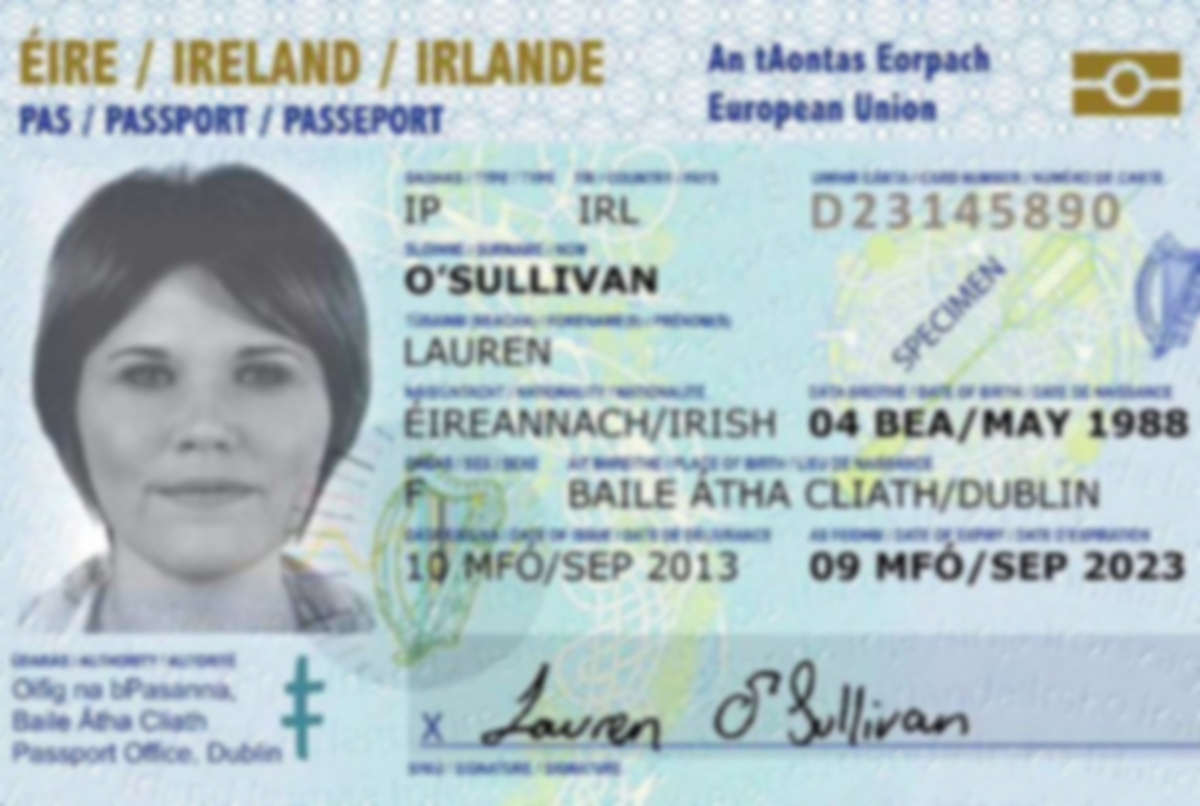

In [12]:
# apply Gaussian blur to the image
img_blur = img.filter(ImageFilter.GaussianBlur(3))
img_blur

In [15]:
text_blur = pytesseract.image_to_string(img_blur,lang='eng')
print(text_blur)

EIRE / IRELAND / IRLANDE —An thontas Eorpach 7 =
PAS / PASSPORT / PASSEPORT European Unroa ee
Ip IRL D23145890
oe a : ,

O’SULLIVAN -

—m- rn on re i

EIREANNACH/IRISH 04 BEA/MAY 1988
BAILE ATHA TH/DUBLIN

SEP 2013 09 “MFO/SEP 2023

fe oy Sinan


## add noise to the image

In [16]:
img_array = np.array(img)
img_grey = color.rgb2gray(img_array)

noise = np.ones_like(img_grey) * 0.2 * (img_grey.max() - img_grey.min())

noise[np.random.random(size=noise.shape) > 0.5] *=-1

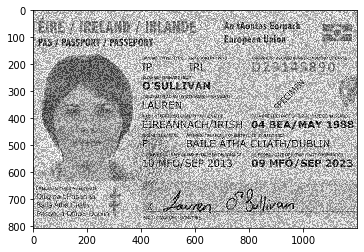

In [17]:
img_noisy = img_grey + noise

plt.imshow(img_noisy,cmap='gray')
plt.show()

In [18]:
text_noisy = pytesseract.image_to_string(img_noisy,lang='eng')

print(text_noisy)